In [1]:
import pandas as pd
import os
from utils.ml_utils import PreprocessingUtils, GBEmissionsPredictionPipeline
from utils.eda_utils import EDAUtils, DataCleaningUtils
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/home/tony-ubuntu/anaconda3/envs/metamodel_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
SCRIPT_DIR_PATH = os.getcwd()
ROOT_DIR_PATH = os.path.dirname(SCRIPT_DIR_PATH)
DATA_DIR_PATH = os.path.join(ROOT_DIR_PATH, "data")
MAPPING_DIR_PATH = os.path.join(DATA_DIR_PATH, "mapping")
PREDICTORS_DIR_PATH = os.path.join(DATA_DIR_PATH, "predictors")
SSP_DIR_PATH = os.path.join(DATA_DIR_PATH, "ssp")
SIMULATION_DIR_PATH = os.path.join(SSP_DIR_PATH, "sisepuede_run_2025-01-14T17;04;06.975301_output_database")
TRAINING_DIR_PATH = os.path.join(DATA_DIR_PATH, "training")

In [4]:
TRAINING_DATA_PATH = os.path.join(TRAINING_DIR_PATH, "training_data.csv")
training_df = pd.read_csv(TRAINING_DATA_PATH)
training_df = training_df.drop(columns=["primary_id", "future_id"])
training_df.head()

,group_1_ef_lvst_entferm,group_2_yf_agrc,group_3_demscalar_soil,group_4_demscalar_ippu,group_5_efficfactor_enfu_industrial_energy_fuel,group_6_elecfuelefficiency_trns,group_7_factor_waso_waste_per_capita_scalar_food,group_8_frac_fgtv,group_9_frac_agrc_agriculture_production_lost,group_10_frac_agrc,...,emission_co2e_subsector_total_last_five_years_inen,emission_co2e_subsector_total_last_five_years_ippu,emission_co2e_subsector_total_last_five_years_lndu,emission_co2e_subsector_total_last_five_years_lsmm,emission_co2e_subsector_total_last_five_years_lvst,emission_co2e_subsector_total_last_five_years_scoe,emission_co2e_subsector_total_last_five_years_soil,emission_co2e_subsector_total_last_five_years_trns,emission_co2e_subsector_total_last_five_years_trww,emission_co2e_subsector_total_last_five_years_waso
0,0.952436,0.360397,0.202990,0.995748,0.369859,0.919920,0.478450,0.445798,0.490988,0.510280,...,32.437006,170.411122,49.462783,0.906453,3.535574,8.152285,89.352384,138.564932,4.811716,12.035590
1,0.304955,0.204875,0.540658,0.800192,0.206396,0.777352,0.805727,0.536048,0.779857,0.623335,...,37.959592,160.811434,38.170739,0.970521,4.244111,8.154926,81.322226,156.911769,8.015643,5.746137
2,0.609262,0.366443,0.601808,0.916668,0.386475,0.181162,0.138910,0.768925,0.884425,0.232722,...,19.116132,278.256437,36.429337,1.228347,4.422138,18.414907,76.882749,121.007564,4.921821,5.133122
3,0.815313,0.487444,0.323954,0.634299,0.064625,0.926815,0.633805,0.439346,0.027114,0.532020,...,48.859457,336.430495,28.664949,1.090020,3.910358,13.270447,70.415909,121.967384,6.411074,8.231365
4,0.973878,0.842718,0.884382,0.483039,0.455502,0.003343,0.571994,0.108021,0.346714,0.892123,...,27.739520,251.830128,46.485526,0.984459,3.737274,15.296131,76.307252,229.067385,7.548845,10.952978


In [5]:
# Set some parameters
use_pca = False

## EDA

In [6]:
edau = EDAUtils()

In [7]:
emission_subsector_cols = [col for col in training_df.columns if col.startswith("emission_co2e")]
emission_subsector_cols

['emission_co2e_subsector_total_last_five_years_agrc',
 'emission_co2e_subsector_total_last_five_years_ccsq',
 'emission_co2e_subsector_total_last_five_years_entc',
 'emission_co2e_subsector_total_last_five_years_fgtv',
 'emission_co2e_subsector_total_last_five_years_frst',
 'emission_co2e_subsector_total_last_five_years_inen',
 'emission_co2e_subsector_total_last_five_years_ippu',
 'emission_co2e_subsector_total_last_five_years_lndu',
 'emission_co2e_subsector_total_last_five_years_lsmm',
 'emission_co2e_subsector_total_last_five_years_lvst',
 'emission_co2e_subsector_total_last_five_years_scoe',
 'emission_co2e_subsector_total_last_five_years_soil',
 'emission_co2e_subsector_total_last_five_years_trns',
 'emission_co2e_subsector_total_last_five_years_trww',
 'emission_co2e_subsector_total_last_five_years_waso']

In [8]:
lhs_group_cols = [col for col in training_df.columns if col.startswith("group_")]
# lhs_group_cols

In [9]:
training_df[emission_subsector_cols].describe()

,emission_co2e_subsector_total_last_five_years_agrc,emission_co2e_subsector_total_last_five_years_ccsq,emission_co2e_subsector_total_last_five_years_entc,emission_co2e_subsector_total_last_five_years_fgtv,emission_co2e_subsector_total_last_five_years_frst,emission_co2e_subsector_total_last_five_years_inen,emission_co2e_subsector_total_last_five_years_ippu,emission_co2e_subsector_total_last_five_years_lndu,emission_co2e_subsector_total_last_five_years_lsmm,emission_co2e_subsector_total_last_five_years_lvst,emission_co2e_subsector_total_last_five_years_scoe,emission_co2e_subsector_total_last_five_years_soil,emission_co2e_subsector_total_last_five_years_trns,emission_co2e_subsector_total_last_five_years_trww,emission_co2e_subsector_total_last_five_years_waso
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.535185,-78.060794,199.761485,7.684060e+05,-120.624093,37.985035,288.384484,42.142291,1.081823,4.692572,13.311118,76.799055,200.596342,7.082923,9.340795
std,0.930252,36.893240,66.674477,1.071674e+07,16.057323,13.088637,70.745006,7.398531,0.195306,0.698426,6.761102,7.574320,51.888531,1.633506,3.001107
min,5.120382,-141.860906,0.000000,0.000000e+00,-152.511771,9.481405,130.962794,27.019688,0.628799,3.033455,1.936001,52.805124,98.222119,3.750551,3.835560
25%,6.874223,-109.919278,149.967427,1.794705e+01,-133.930444,27.532930,233.362873,35.965916,0.939363,4.188121,7.524093,71.486278,156.277242,5.736882,6.751803
50%,7.509914,-78.115395,189.615348,2.445040e+01,-120.804051,37.731565,284.777596,42.640595,1.074327,4.652400,13.052387,76.361649,199.285265,7.058855,9.373437
75%,8.170789,-46.128974,246.149940,3.490386e+01,-107.020154,47.709225,338.326399,48.297592,1.221827,5.197214,18.305368,82.129659,242.048252,8.447790,11.946039
max,9.807744,-14.219294,406.028208,2.268710e+08,-88.566561,74.039201,485.800910,57.797043,1.583632,6.614399,30.221088,98.078386,340.471613,10.683759,14.956282


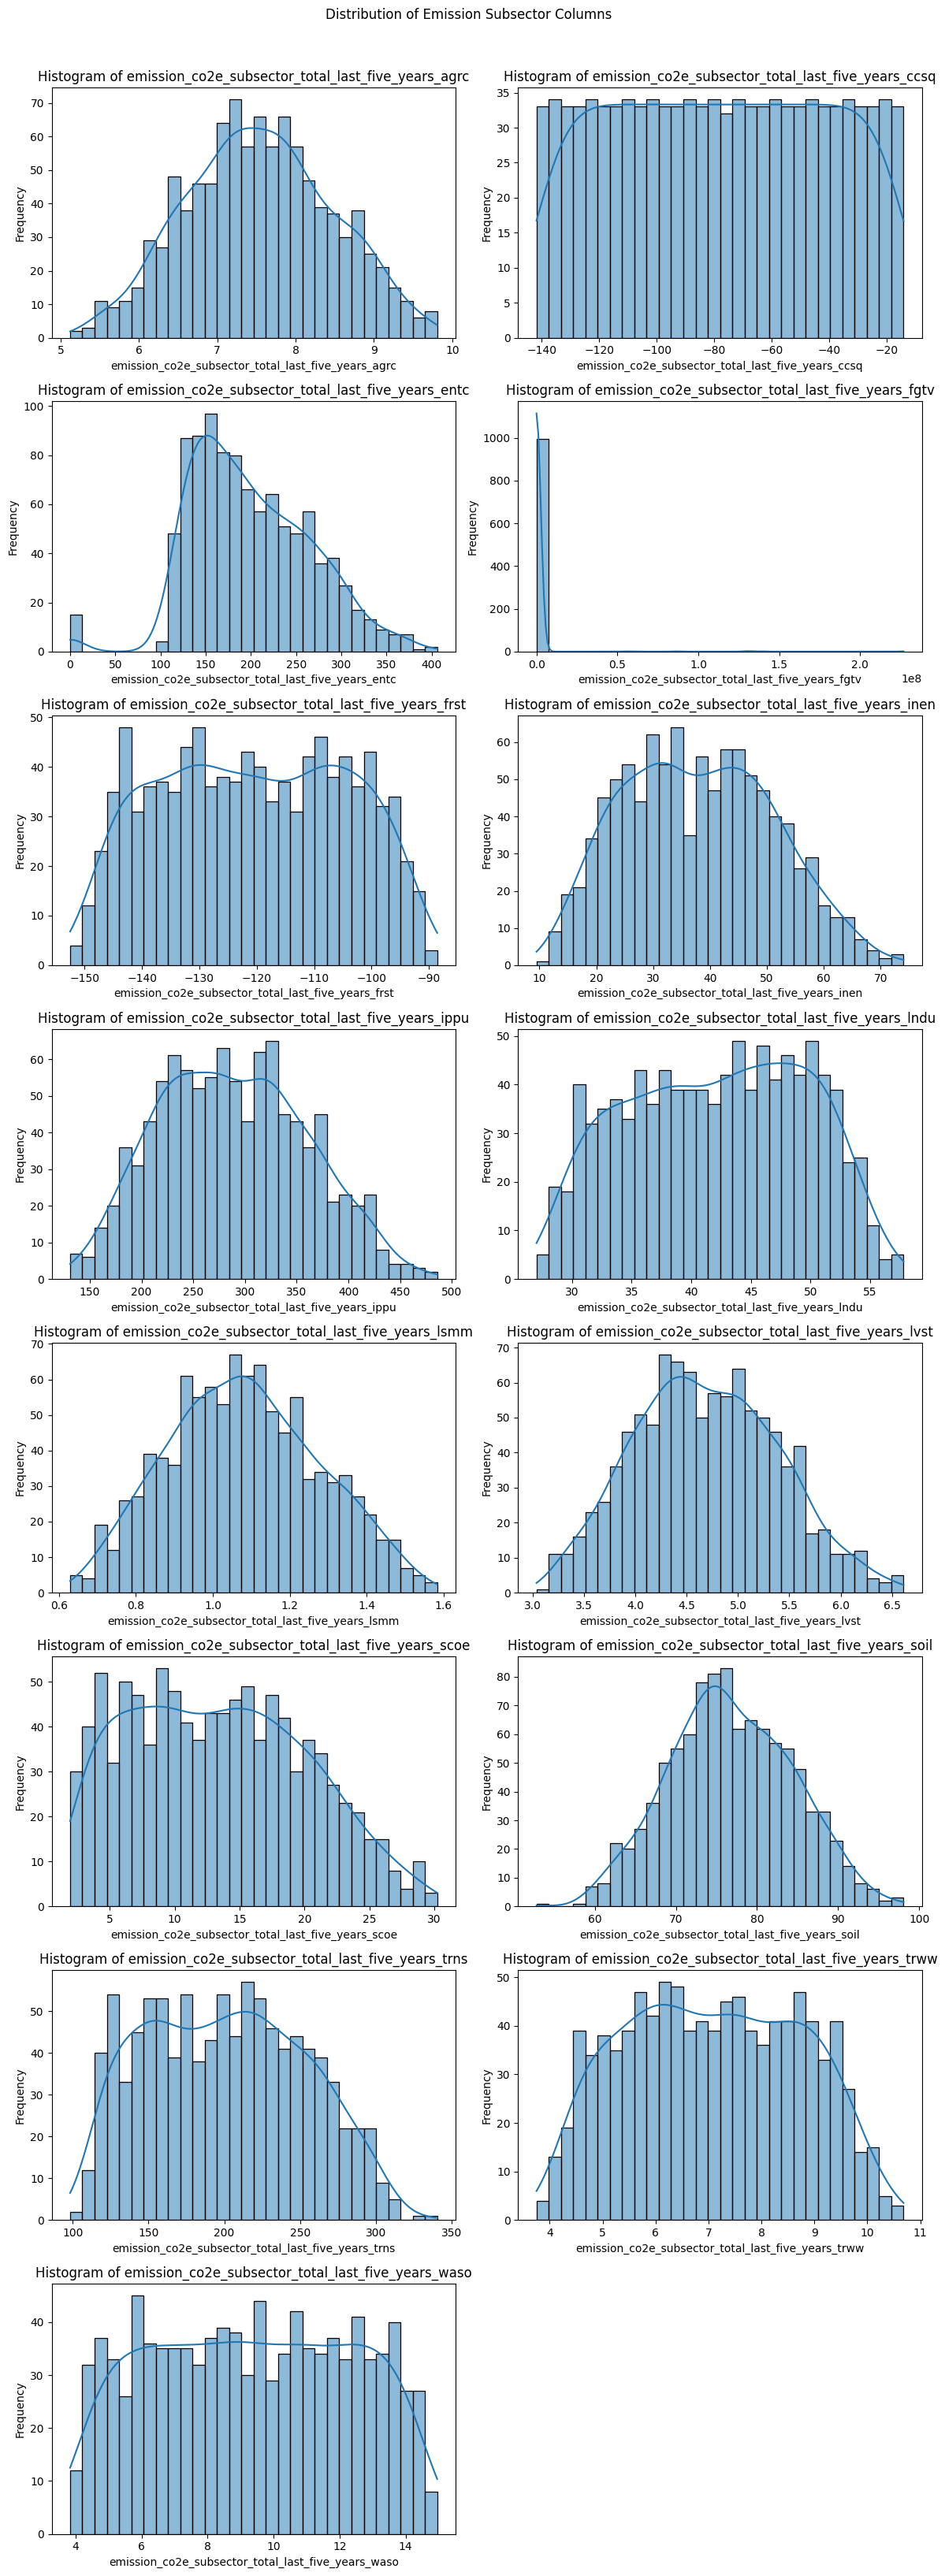

In [10]:
edau.plot_multiple_histograms(training_df, emission_subsector_cols, title="Distribution of Emission Subsector Columns")


In [11]:
# Correlation with target variable
for col in emission_subsector_cols:
    print(edau.get_target_var_corr(training_df[lhs_group_cols + [col]], col))


Correlation with target variable 'emission_co2e_subsector_total_last_five_years_agrc' (threshold: 0.1):
--------------------------------------------------
emission_co2e_subsector_total_last_five_years_agrc : 1.0000
group_44_ef_agrc_anaerobicdom_rice_kg_ch4_ha : 0.7417
group_10_frac_agrc             : 0.4771
group_32_lndu_reallocation_factor : 0.3992
group_2_yf_agrc                : 0.1580
group_13_frac_gnrl_eating_red_meats+ : 0.1490

None

Correlation with target variable 'emission_co2e_subsector_total_last_five_years_ccsq' (threshold: 0.1):
--------------------------------------------------
emission_co2e_subsector_total_last_five_years_ccsq : 1.0000

None

Correlation with target variable 'emission_co2e_subsector_total_last_five_years_entc' (threshold: 0.1):
--------------------------------------------------
emission_co2e_subsector_total_last_five_years_entc : 1.0000
group_34_nemomod_en            : 0.8704
group_26_frac_inen_energy      : 0.1833
group_17_frac_trns_fuelmix     : 0.12

In [12]:
# # Summary table
# summary = edau.numeric_summary(training_df)
# summary

In [13]:
# Find constant / near-constant cols
const_cols = edau.find_constant_columns(training_df)
near_const_cols = edau.find_near_constant_columns(training_df, threshold=1e-2)
print("Constant:", const_cols)
print("Near-constant:", near_const_cols)

Constant: []
Near-constant: []


In [14]:
# Outlier inspection
outliers = edau.find_outlier_columns(training_df, z_thresh=3.0)
print("Outlier percentages:", outliers)

Outlier percentages: {'total_emissions_last_five_years': 0.6, 'emission_co2e_subsector_total_last_five_years_entc': 0.2, 'emission_co2e_subsector_total_last_five_years_fgtv': 0.6, 'emission_co2e_subsector_total_last_five_years_soil': 0.1}


In [15]:
# Plot all histograms (will show a big grid of 80 plots)
# edau.plot_all_histograms(training_df, bins=30, max_cols=5, figsize_per_plot=(3,2))

## Data Cleaning

In [16]:
dcu = DataCleaningUtils()

In [17]:
training_df.shape

(1000, 62)

In [18]:
training_df_cleaned = dcu.remove_outliers(training_df)
print("Shape after removing outliers:", training_df_cleaned.shape)

Shape after removing outliers: (991, 62)


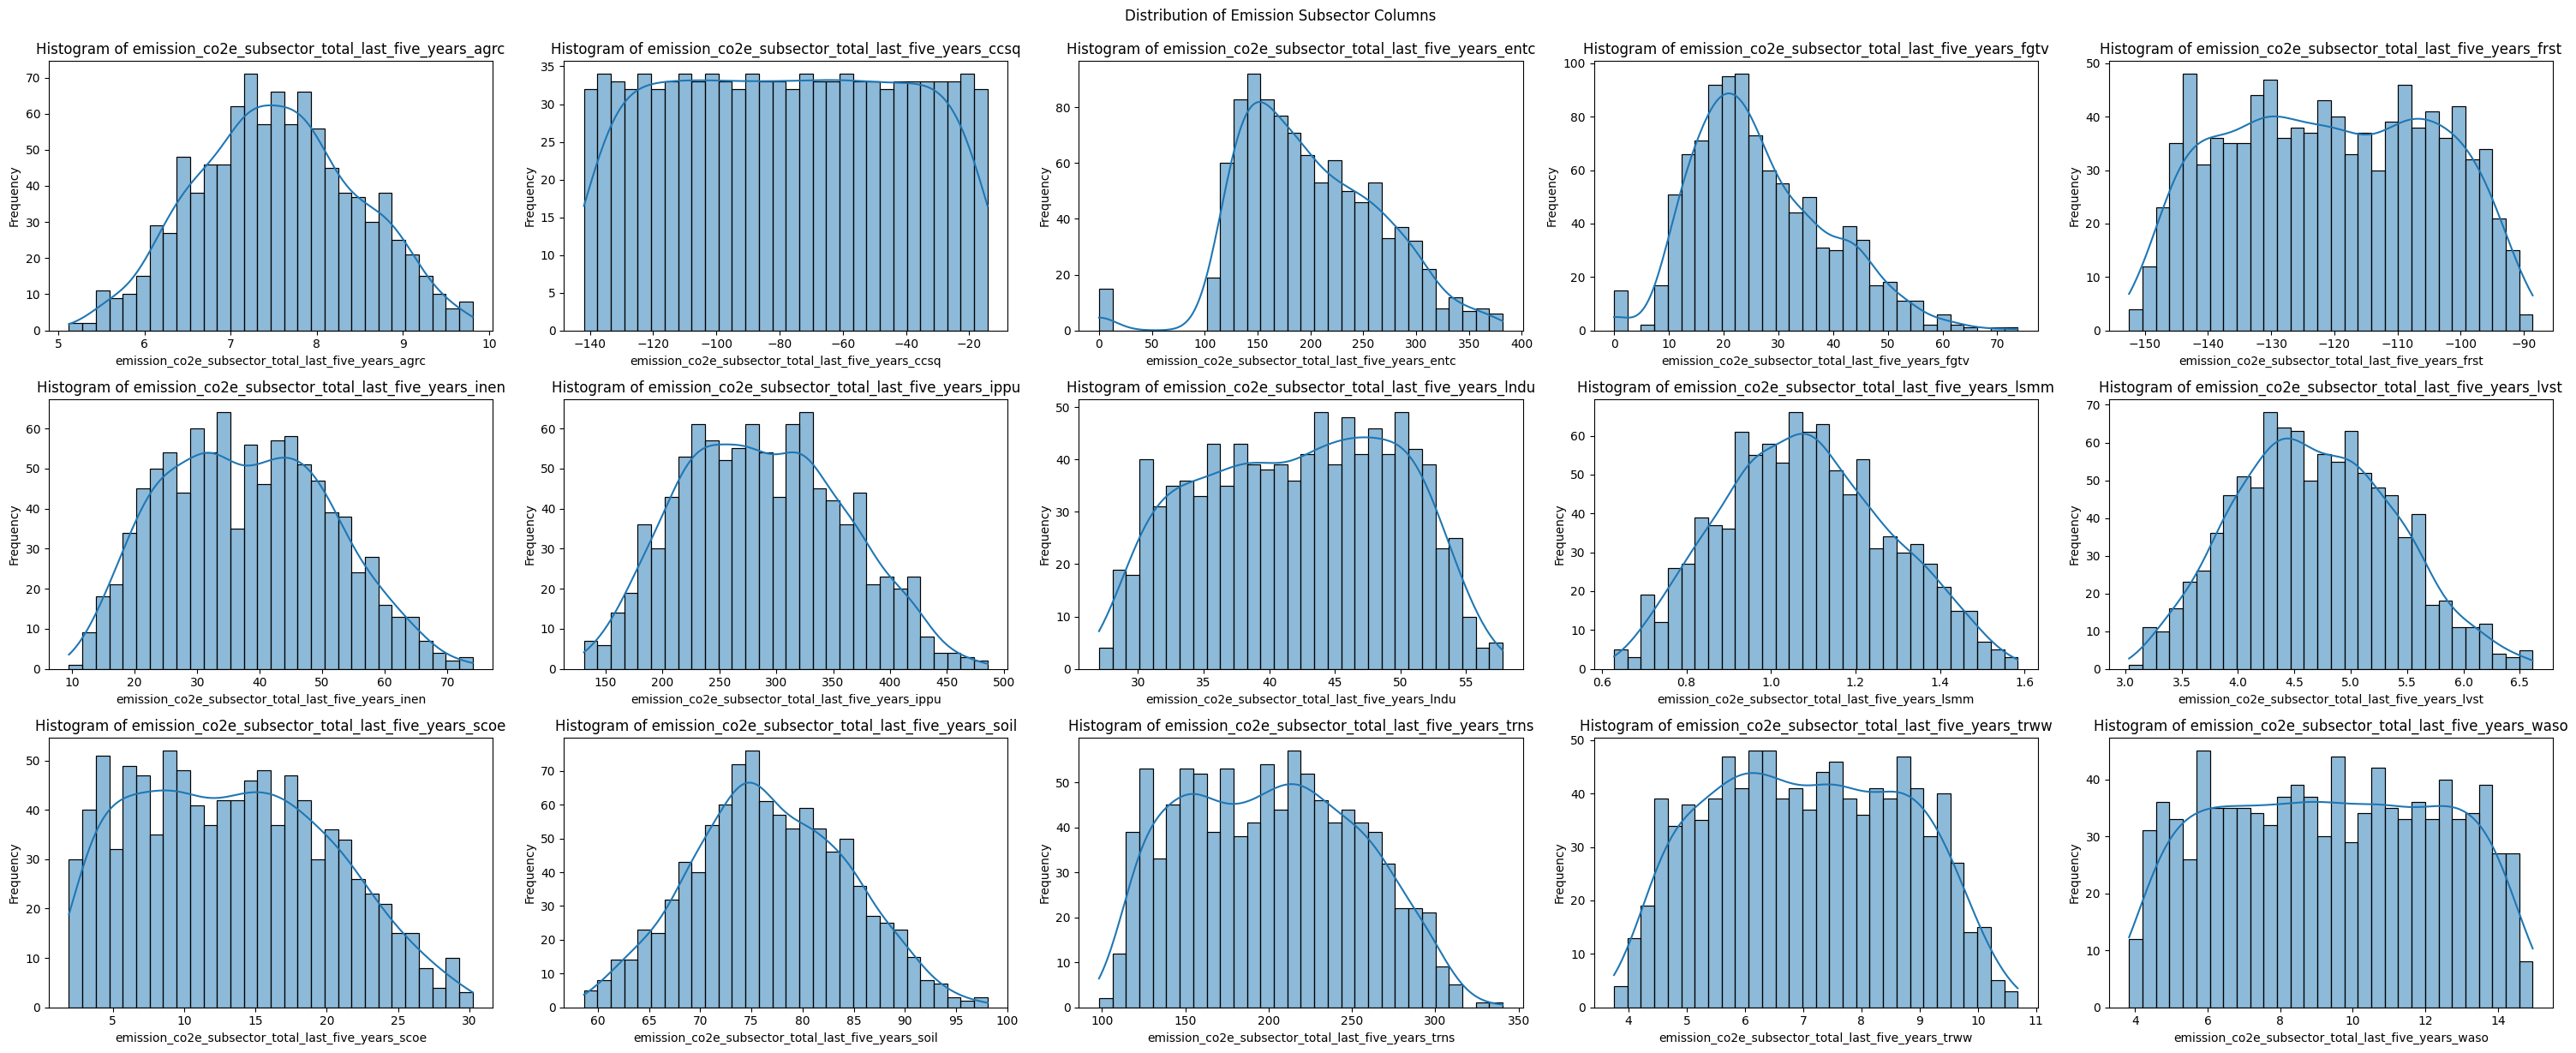

In [19]:
edau.plot_multiple_histograms(training_df_cleaned, emission_subsector_cols, title="Distribution of Emission Subsector Columns", n_cols=5)

In [20]:
outliers = edau.find_outlier_columns(training_df_cleaned, z_thresh=3.0)
print("Outlier percentages:", outliers)

Outlier percentages: {'total_emissions_last_five_years': 0.10090817356205853, 'emission_co2e_subsector_total_last_five_years_entc': 1.513622603430878, 'emission_co2e_subsector_total_last_five_years_fgtv': 0.30272452068617556}


In [21]:
# Get the corr with target variable again
for col in emission_subsector_cols:
    print(edau.get_target_var_corr(training_df_cleaned[lhs_group_cols + [col]], col, threshold=0.2))


Correlation with target variable 'emission_co2e_subsector_total_last_five_years_agrc' (threshold: 0.2):
--------------------------------------------------
emission_co2e_subsector_total_last_five_years_agrc : 1.0000
group_44_ef_agrc_anaerobicdom_rice_kg_ch4_ha : 0.7416
group_10_frac_agrc             : 0.4757
group_32_lndu_reallocation_factor : 0.3957

None

Correlation with target variable 'emission_co2e_subsector_total_last_five_years_ccsq' (threshold: 0.2):
--------------------------------------------------
emission_co2e_subsector_total_last_five_years_ccsq : 1.0000

None

Correlation with target variable 'emission_co2e_subsector_total_last_five_years_entc' (threshold: 0.2):
--------------------------------------------------
emission_co2e_subsector_total_last_five_years_entc : 1.0000
group_34_nemomod_en            : 0.8710

None

Correlation with target variable 'emission_co2e_subsector_total_last_five_years_fgtv' (threshold: 0.2):
--------------------------------------------------
e

In [22]:
# edau.check_for_multicollinearity(training_df_cleaned, threshold=0.8)

## Preprocessing

In [23]:
ppu = PreprocessingUtils()

## ML

In [36]:
for subsector in emission_subsector_cols:
    epp = GBEmissionsPredictionPipeline(training_df_cleaned[lhs_group_cols + [subsector]], target=subsector, test_size=0.2, random_state=42)
    print(f"Running pipeline for subsector: {subsector}")
    # print(f"Columns used: {epp.df.columns.tolist()}")
    epp.run(tune=False, log_transform=False, create_plots=True)

Running pipeline for subsector: emission_co2e_subsector_total_last_five_years_agrc
Top 2 feature importances: Index(['group_44_ef_agrc_anaerobicdom_rice_kg_ch4_ha', 'group_10_frac_agrc'], dtype='object')
Importances: [0.47031468 0.18941428]
Running pipeline for subsector: emission_co2e_subsector_total_last_five_years_ccsq
Top 2 feature importances: Index(['group_36_pij_lndu_croplands_to', 'group_43_pij_lndu_wetlands_to'], dtype='object')
Importances: [0.04777222 0.0354016 ]
Running pipeline for subsector: emission_co2e_subsector_total_last_five_years_entc
Top 2 feature importances: Index(['group_34_nemomod_en', 'group_26_frac_inen_energy'], dtype='object')
Importances: [0.598677   0.05278525]
Running pipeline for subsector: emission_co2e_subsector_total_last_five_years_fgtv
Top 2 feature importances: Index(['group_34_nemomod_en', 'group_8_frac_fgtv'], dtype='object')
Importances: [0.49442425 0.23716189]
Running pipeline for subsector: emission_co2e_subsector_total_last_five_years_frst
